# Problem Statement- Predict BMI based on Age, Height, Weight as input parameters

The Purpose of this assigment is to address the below point:

- Objective
  - Create the training dataset based on the BMI business rules.
  - Develop a model to predict BMI.
  - Write steps to operationalize the model.

- Business Understanding
   - Company's VP required an application using which customers can get an instant quote based on their Age, Gender, Height, Weight that would eventually enhance the public perception of the industry.

- DataSet
  - Sample dataset(Dummy-Data.csv) has 100 row with unique AppIDs; Each row has Ins_Age, Ins_Gender, Ht, Wt, Issue_Date

- DataSet Understanding
  - Unique AppID represents different costumers having age, gender, height, weight as their input features. BMI calculation requires Height in meter-square and Weight in Kg, hence below steps were taken to do the needfil-
  - Height(Ht) was recalculated to Feet-Inches in csv file using excel formula "=CONCATENATE(Left(Ht,1),".",Right(Ht,2))" and later converted to Meter-Squared using "=(Ht_in_Feet*0.3048)^2"
  - Weight(Wt) was recalculated to Kg in csv file using excel formula "=0.453592*Wt"
  - BMI Column is then calculated. 
  
## Solution Development

- Sample Logic for Quotes Calculation
  - Similar logic needs to be encorporated in the backend logic for the solution development.
  - Detailed Solution Deployment part is covered post model building

# Import Required Libraries

In [88]:
import pandas as pd
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import numpy as np
#For Regression problem model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_scor

# Import dataset 

In [89]:
df = pd.read_csv("Dummy-Data.csv")
#Create Dummy Quotes Column (Not Required)
df['Reason']=df['Quotes']

In [90]:
df.head()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate,Wt_in_kg,Ht_in_Feet,Ht_in_Sqrd_Mtr,BMI,Quotes,Reason
0,56372,31,Male,510,185,NaN,83.914520,5.10,2.416408,34.726966,NaN,NaN
1,34565,35,Male,510,205,NaN,92.986360,5.10,2.416408,38.481232,NaN,NaN
2,57732,45,Female,510,125,NaN,56.699000,5.10,2.416408,23.464166,NaN,NaN
3,87324,38,Male,503,175,NaN,79.378600,5.03,2.350531,33.770504,NaN,NaN
4,12323,39,Female,600,252,NaN,114.305184,6.00,3.344509,34.176966,NaN,NaN


# Data Cleaning & Processing

In [96]:
#Attributes' property Check
df.dtypes

AppID               int64
Ins_Age             int64
Ins_Gender         object
Ht                  int64
Wt                  int64
IssueDate         float64
Wt_in_kg          float64
Ht_in_Feet        float64
Ht_in_Sqrd_Mtr    float64
BMI               float64
Quotes            float64
Reason            float64
dtype: object

In [97]:
#Check Null Values in Dataframe
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AppID           100 non-null    int64  
 1   Ins_Age         100 non-null    int64  
 2   Ins_Gender      100 non-null    object 
 3   Ht              100 non-null    int64  
 4   Wt              100 non-null    int64  
 5   IssueDate       0 non-null      float64
 6   Wt_in_kg        100 non-null    float64
 7   Ht_in_Feet      100 non-null    float64
 8   Ht_in_Sqrd_Mtr  100 non-null    float64
 9   BMI             100 non-null    float64
 10  Quotes          0 non-null      float64
 11  Reason          0 non-null      float64
dtypes: float64(7), int64(4), object(1)
memory usage: 9.5+ KB


In [98]:
#Finding duplicate rows
duplicate = df[df.duplicated()]
print(len(duplicate))
print("Length of dataframe before removing duplicate rows :",len(df))
# dropping duplicate values
df.drop_duplicates(keep=False,inplace=True)
print("Length of dataframe after removing duplicate rows :",len(df))

0
Length of dataframe before removing duplicate rows : 100
Length of dataframe after removing duplicate rows : 100


# Calculate Quotes

In [64]:
for i in range (0,len(df)):
    if (df['Ins_Age'][i] <= 18 & df['Ins_Age'][i] >= 39)  & (df['BMI'][i] < 17.49 or df['BMI'][i] > 38.5):
        df['Quotes'][i] = 750
        df['Reason'][i] = "Age is between 18 to 39 and 'BMI' is either less than 18.49 or greater than 38.5"
    elif (df['Ins_Age'][i] <= 40 & df['Ins_Age'][i] >= 59)  & (df['BMI'][i] < 17.49 or df['BMI'][i] > 38.5):
        df['Quotes'][i] = 1000
        df['Reason'][i] = "Age is between 40 to 59 and 'BMI' is either less than 18.49 or greater then 38.5"
    elif (df['Ins_Age'][i] > 60)  & (df['BMI'][i] < 18.49 or df['BMI'][i] > 45.5):
        df['Quotes'][i] = 2000
        df['Reason'][i] = "Age is greater than 60 and 'BMI' is either less than 18.49 or greater than 38.5"
        print("i in elif2 :",i)
    else:
        df['Quotes'][i] = 500
        df['Reason'][i] = "BMI is in right range"
        
    
    if df['Ins_Gender'][i] == "Female":
        df['Quotes'][i] = (0.9)*(df['Quotes'][i])

In [65]:
df.head()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate,Wt_in_kg,Ht_in_Feet,Ht_in_Sqrd_Mtr,BMI,Quotes,Reason
0,56372,31,Male,510,185,NaN,83.914520,5.10,2.416408,34.726966,500.0,BMI is in right range
1,34565,35,Male,510,205,NaN,92.986360,5.10,2.416408,38.481232,500.0,BMI is in right range
2,57732,45,Female,510,125,NaN,56.699000,5.10,2.416408,23.464166,450.0,BMI is in right range
3,87324,38,Male,503,175,NaN,79.378600,5.03,2.350531,33.770504,500.0,BMI is in right range
4,12323,39,Female,600,252,NaN,114.305184,6.00,3.344509,34.176966,450.0,BMI is in right range


# Exploratory Data Analysis 
# Plot Correlation plot 

,Ins_Age,Ht,Wt,BMI
Ins_Age,1.000000,-0.016107,-0.078824,-0.062323
Ht,-0.016107,1.000000,-0.040016,-0.630816
Wt,-0.078824,-0.040016,1.000000,0.793356
BMI,-0.062323,-0.630816,0.793356,1.000000


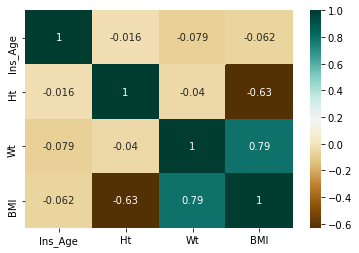

In [92]:
import seaborn as sns
df1=df[['Ins_Age','Ht','Wt','BMI']]
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Check for Output Data Distribution plot before prediction

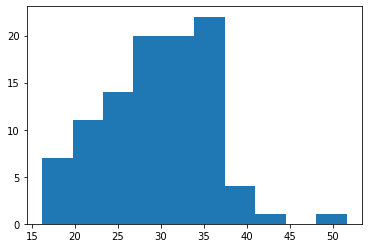

In [70]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(df['BMI'])
plt.show()

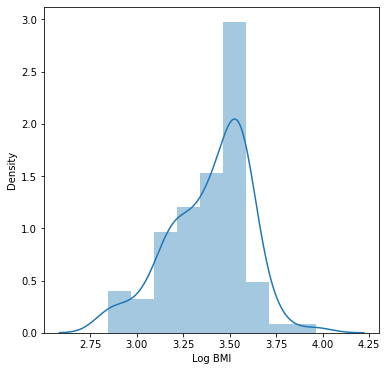

In [101]:
df['Log BMI']=np.log(df['BMI']+1)
plt.figure(figsize=(6,6))
sns.distplot(df['Log BMI'])
plt.show()

# Check for Outliers

<AxesSubplot:xlabel='BMI'>

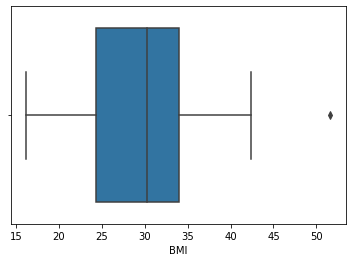

In [71]:
sns.boxplot(x=df['BMI'])

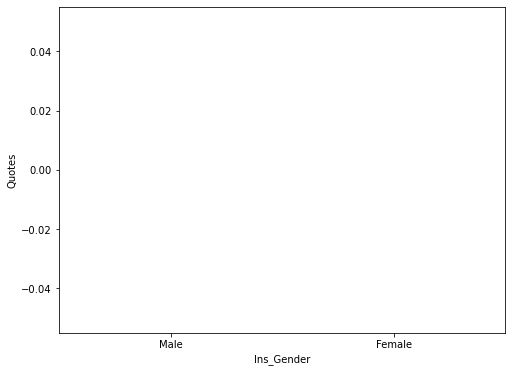

In [100]:
eda1=df.loc[:, ['Quotes', 'Ins_Gender'] ].groupby(['Ins_Gender']).mean()
plt.figure(figsize=(8, 6))
splot=sns.barplot(data=df,y='Quotes',x='Ins_Gender',orient="v")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Ins_Gender", size=10)
plt.ylabel("Quotes", size=10)
plt.savefig("Average Quotes per Gender.png")

# One Hot encoding of Categorical Variable

In [74]:
#created dataframe to perform forecasting
df_forecast=df[['Ins_Age','Ins_Gender','Wt_in_kg','Ht_in_Sqrd_Mtr','Ht','Wt','BMI']]

categorical_features = ['Ins_Gender']
df_forecast = pd.get_dummies(df_forecast, columns = categorical_features)
df_forecast.head(2)

,Ins_Age,Wt_in_kg,Ht_in_Sqrd_Mtr,Ht,Wt,BMI,Ins_Gender_Female,Ins_Gender_Male
0,31,83.91452,2.416408,510,185,34.726966,0,1
1,35,92.98636,2.416408,510,205,38.481232,0,1


# Model Building

In [81]:
X= df_forecast[['Ins_Age','Ins_Gender_Female','Wt_in_kg','Ht_in_Sqrd_Mtr','Ht','Wt']]
Y= df_forecast[['BMI']]
num_instances = len(X)
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test,y_train,y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
results2 = []
results3 = []

names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    r2 = r2_score(predictions, Y)
    #print("r2_score :",r2_score)
    #nmse = p.sqrt(mean_squared_error(predictions,Y))
      
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    #results2.append(nmse)
    #results3.append(r2)
    names.append(name)
    
    msg = "%s: %f (%f) (%f)" % (name, score, mae, r2)
    print(msg)

LiR: 0.989640 (0.445775) (0.989532)
Ridge: 0.989620 (0.445844) (0.989511)
Lasso: 0.988823 (0.465278) (0.988537)
ElasticNet: 0.988943 (0.456484) (0.988729)
Bag_Re: 0.984693 (0.271689) (0.983691)
RandomForest: 0.994125 (0.197728) (0.993560)
ExtraTreesRegressor: 1.000000 (0.000000) (1.000000)
KNN: 0.955670 (0.578941) (0.948660)
CART: 1.000000 (0.000000) (1.000000)
SVM: 0.258328 (4.361025) (-35.024347)


# Choosing Best Model for deployment

In [85]:
# Fit the model on training set
model = LinearRegression()
model.fit(X, Y)
model.score(X_test,y_test)

0.9892207042957537

# Pickle file for Productionize 

In [87]:
import pickle
filename = 'LinearRegression_v1.pickle'
pickle.dump(model, open(filename, 'wb'))

# Steps to Operationalize Model-  

- Create a html file to design the UI template
- Create app.py file using Flask to do the Backend calculation
- Use the above pickle file to perform real time prediction

- Create a html file to design the UI template 
  - Create the training dataset based on the BMI business rules.
  
  <!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
  <meta charset="UTF-8">
  <title>ML API</title> 
</head>

<body>
 <div class="login">
	<h1>Predict BMI</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
    	<input type="text" name="Age" placeholder="Age" required="required" />
        <input type="text" name="Height" placeholder="Height" required="required" />
		<input type="text" name="Weight" placeholder="Weight" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

 </div>


</body>
</html>

- Create an app.py file using Flask/Dash or any similar library
  - Import Flask, Pickle with below high level code-